# Data Exploration of Realty CSV

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## First Look

Lets take a look at the data in a pd DataFrame first

In [2]:
# Load CSV as dataframe
df = pd.read_csv('../data/data.csv')

# Display first 10 rows
df.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Lets see what the first non numerical column looks like in detail

In [3]:
# Check dyptes of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Get non numeric columns
non_numeric_columns = df.select_dtypes(exclude=["number"]).columns.tolist()
print(non_numeric_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [5]:
# Show MSZoning column value counts
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Testing one-hot encoding on the first non-numerical column

In [6]:
# Testing one-hot encoding

df_encoded_test = pd.get_dummies(df, columns=["MSZoning"])

df_encoded_test.head(n=10)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,False,False,False,True,False
1,2,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,False,False,False,True,False
2,3,60,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,False,False,False,True,False
3,4,70,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,False,False,False,True,False
4,5,60,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,False,False,False,True,False
5,6,50,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,10,2009,WD,Normal,143000,False,False,False,True,False
6,7,20,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,8,2007,WD,Normal,307000,False,False,False,True,False
7,8,60,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,11,2009,WD,Normal,200000,False,False,False,True,False
8,9,50,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,4,2008,WD,Abnorml,129900,False,False,False,False,True
9,10,190,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,1,2008,WD,Normal,118000,False,False,False,True,False


## Data Prep

### Check for columns with missing data

In [7]:
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing data:", missing_cols)

Columns with missing data: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


### Drop ID and MISC for simplicity

In [8]:
df.drop(columns=["Id", "MiscFeature", "MiscVal"], inplace=True)

### Filling missing data

Missing data in the collumns needs to be filled.

* For numerical values fill empties with median.

* For objects, fill with most common entry.

In [ ]:
# Function to fill missing values in a DataFrame

def fill_missing(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing values in a DataFrame.
    For numerical columns, fill with median.
    For object columns, fill with "NA".
    
    Parameters:
        df (pd.DataFrame): DataFrame with missing values.
    Returns:
        pd.DataFrame: DataFrame with missing values filled.
    """

    # Find columns with missing values
    missing_cols = df.columns[df.isnull().any()].tolist()
    # print(missing_cols)

    df_filled = df.copy()

    # Fill missing values
    for col in missing_cols:
        if df_filled[col].dtype == "object":
            # Fill with most common entry
            df_filled[col] = df[col].fillna("NA")
        elif df_filled[col].dtype in ["int64", "float64"]:
            # Fill with median
            df_filled[col] = df[col].fillna(df[col].median())

    return df_filled

In [10]:
df_filled = fill_missing(df)

# Check for missing values again
missing_cols = df_filled.columns[df_filled.isnull().any()].tolist()
print("Columns with missing data after filling:", missing_cols)

df_filled.head(n=10)

Columns with missing data after filling: []


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,NA,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,0,NA,NA,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,NA,NA,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,0,NA,NA,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,0,NA,NA,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,...,320,0,0,NA,MnPrv,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,NA,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,0,NA,NA,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,NA,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,0,0,NA,NA,1,2008,WD,Normal,118000


### One-Hot Enconding
Function for one-hot encoding by dropping the column in question and inserting the one-hot encoded columns in its place.

In [ ]:
# One-Hotencoding "in place"

def one_hot_encoding(dataFrame: pd.DataFrame, col_to_encode: str) -> pd.DataFrame:
    """
    Perform one-hot encoding on a specified column of the dataframe and place at the original columns position.
    
    Parameters:
    df (DataFrame): The dataframe to modify.
    col_to_encode (str): The column to one-hot encode.
    
    Returns:
    df (DataFrame): The modified dataframe with one-hot encoded columns inserted at the original column's position.
    """

    df = dataFrame.copy()  # Work on a copy of the dataframe to avoid modifying the original

    col_to_encode = col_to_encode

    # Get one-hot encoded columns
    one_hot_encoded = pd.get_dummies(df[col_to_encode], prefix=col_to_encode, drop_first=True, dtype=int)# drop_first=True to avoid dummy variable trap

    # Get index of column to encode (get index before dropping it)
    col_index = df.columns.get_loc(col_to_encode)

    # Drop the original column (inplace)
    df = df.drop(columns=[col_to_encode])

    # Insert the one-hot encoded columns at the original column's index
    for i, col in enumerate(one_hot_encoded.columns):
        df.insert(col_index + i, col, one_hot_encoded[col])

    return df

Let's one hot encode all object columns

In [18]:
# Get non-numeric columns again after filling missing values
non_numeric_columns = df_filled.select_dtypes(exclude=["number"]).columns.tolist()
print(f"Number of non-numeric columns: {len(non_numeric_columns)}")
print(non_numeric_columns)

# Get value counts for each non-numeric column
for col in non_numeric_columns:
    print(f"Value counts for column",col,":")
    print(df_filled[col].value_counts(dropna=False))
    print('-' * 40)

Number of non-numeric columns: 42
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']
Value counts for column MSZoning :
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------------------------
Value counts for column Street :
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
----------------------------------------
Value counts for column Alley :
Alley
NA      1369
Grvl      50
Pave      41


In [20]:
# Perform one-hot encoding for all object columns
df_encoded = df_filled.copy()  # Start with a copy of the filled dataframe
for col in non_numeric_columns:
    df_encoded = one_hot_encoding(df_encoded, col)  # Yes, performance warnings are due to wanting to keep the original column order.

df_encoded.head(n=10)

print(f"Number of columns befrore one-hot encoding: {len(df_filled.columns)}")
print(f"Number of columns after one-hot encoding: {len(df_encoded.columns)}")

non_numeric_columns = df_encoded.select_dtypes(exclude=["number"]).columns.tolist()
print(f"Number of non-numeric columns after one-hot encoding: {len(non_numeric_columns)}")

Number of columns befrore one-hot encoding: 78
Number of columns after one-hot encoding: 256
Number of non-numeric columns after one-hot encoding: 0


In [14]:
# Check datatypes of the dataframe again
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 256 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(253)
memory usage: 2.9 MB


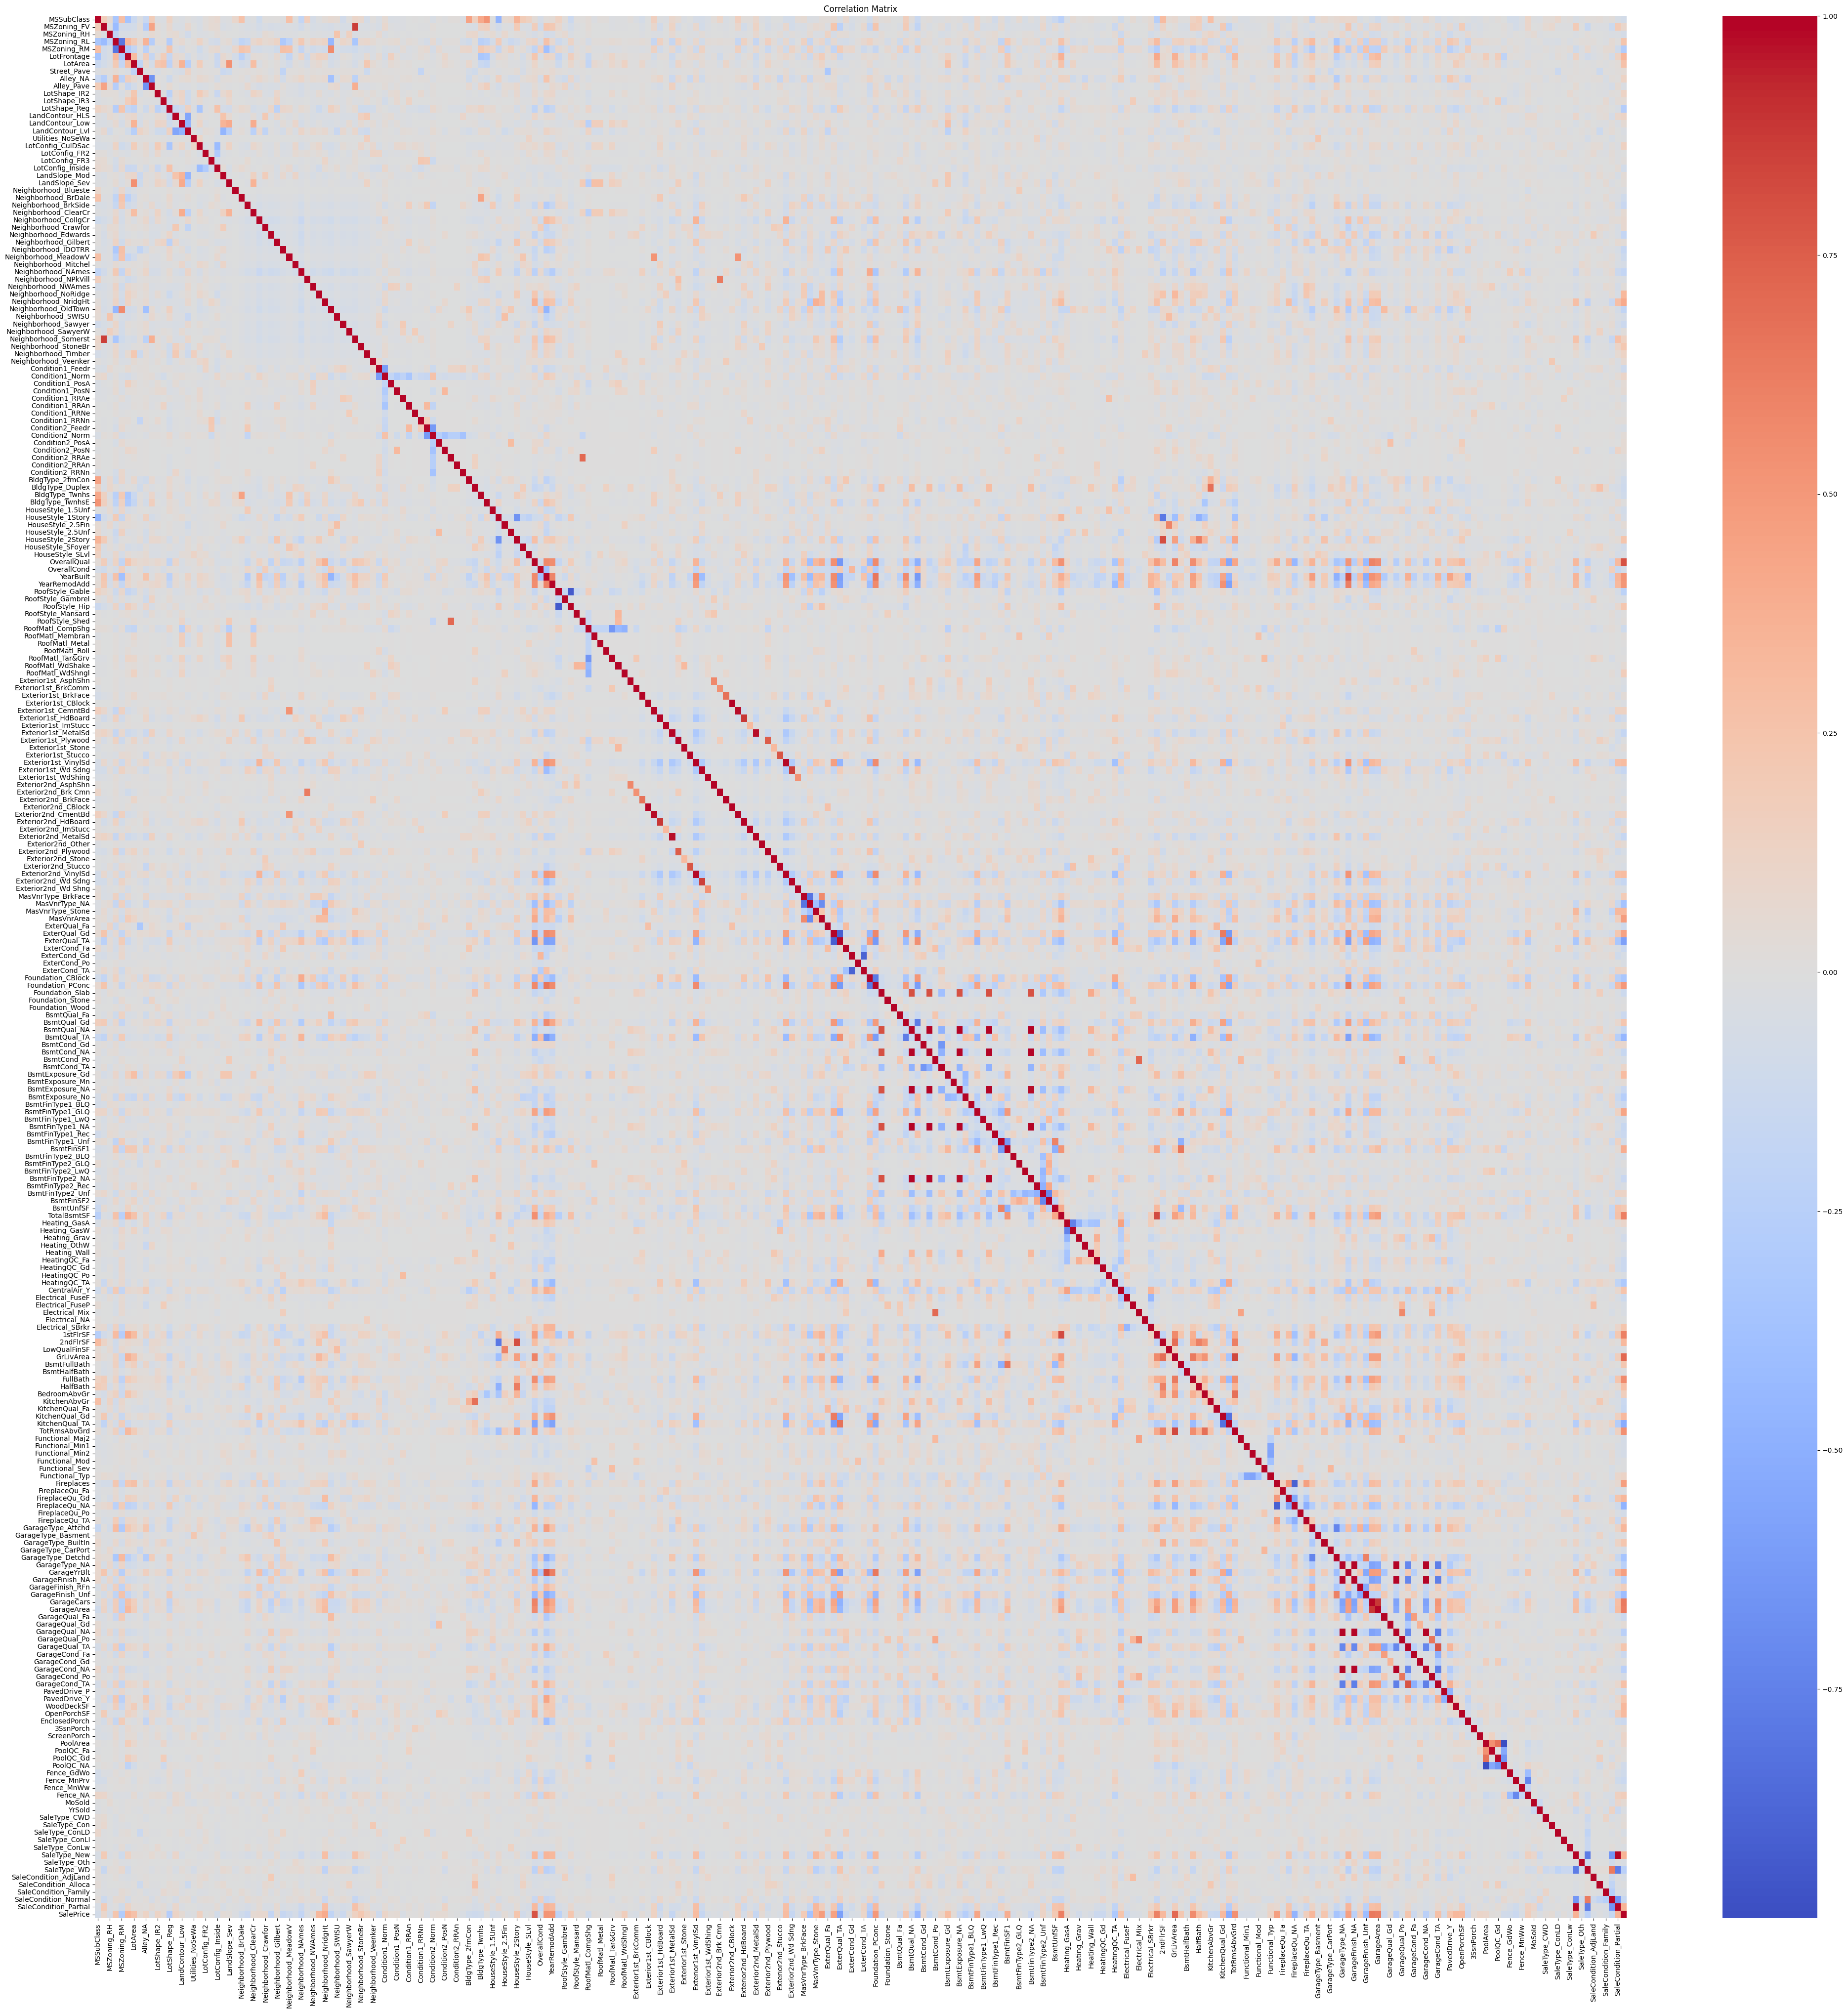

Encoded columns: 256
Correlation matrix columns: 256
Correlation matrix shape: (256, 256)


In [25]:
# Get correlation matrix of the dataframe and visualize with seaborn
 
correlation_matrix = df_encoded.corr(numeric_only=True)
# print(correlation_matrix)

plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# Check shape of correlation_matrix and encoded DataFrame
print("Encoded columns:", len(df_encoded.columns))
print("Correlation matrix columns:", len(correlation_matrix.columns))
print("Correlation matrix shape:", correlation_matrix.shape)

/tmp/ipykernel_244752/1684823061.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_corr_df, x="Correlation", y="Variable", palette="coolwarm")


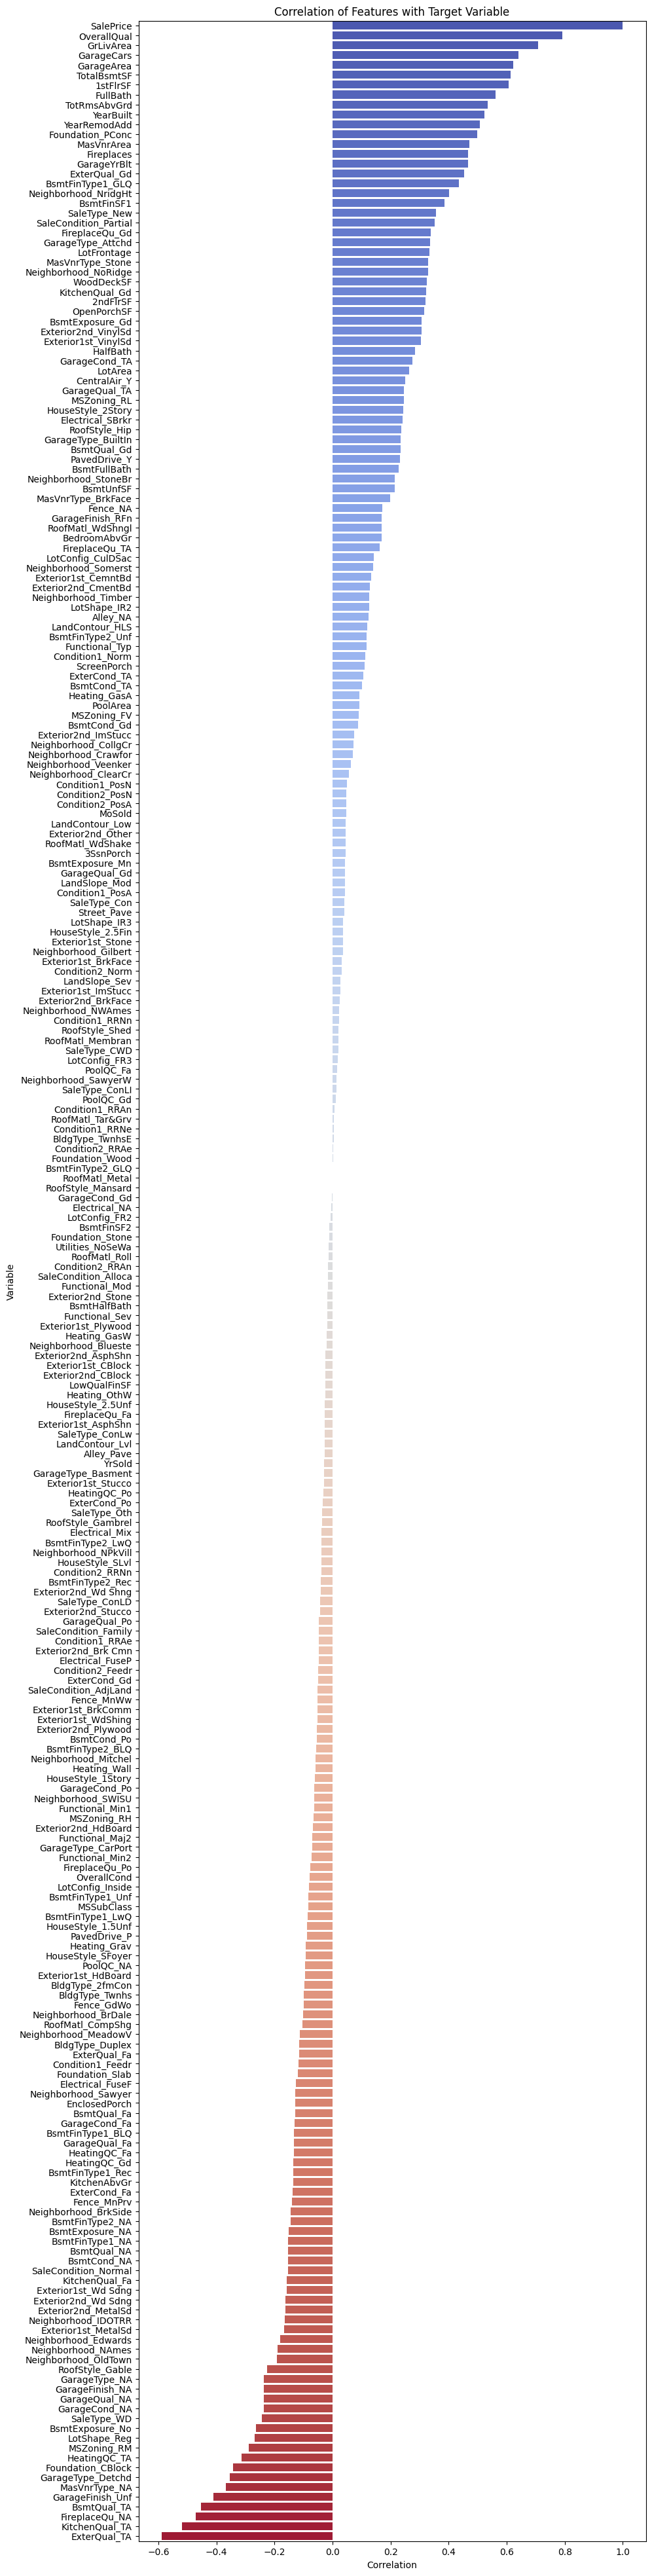

In [30]:
# Get correlation matrix for target variable (sales price)

target_correlation_matrix = correlation_matrix["SalePrice"].sort_values(ascending=False)
# print(target_correlation_matrix)

# Convert to DataFrame for seaborn
target_corr_df = target_correlation_matrix.reset_index()
target_corr_df.columns = ["Variable", "Correlation"]
# target_corr_df.head(n=100)

# Plot
plt.figure(figsize=(10, 50))
sns.barplot(data=target_corr_df, x="Correlation", y="Variable", palette="coolwarm")
plt.title("Correlation of Features with Target Variable")
plt.show()

## PCA to avoid (Multi)Collinearity

Let's go with a PCA during training/validation in the interest of  time but at the cost of explainability. 

In [12]:
import sys
import os

# Add project root to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

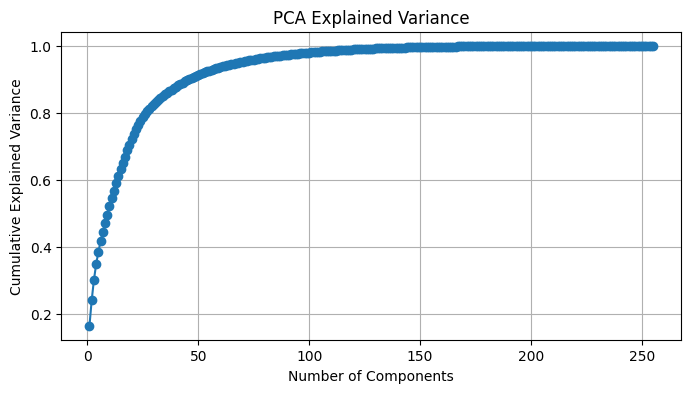

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load data and setting target/label variable
df = pd.read_csv("../data/data_processed_pipeline.csv")
y = df["num_pipeline__SalePrice"]
X = df.drop(columns=["num_pipeline__SalePrice"])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit PCA with all components
pca = PCA()
pca.fit(X_train)

# Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()